# SVM

Trong notebook này, chúng ta sẽ chạy SVM trong dataset nhỏ

Hàm sau đây có nhiệm vụ nhận một data 2 chiều, label của nó và một hàm predict của model. Hàm có nhiệm vụ vẽ data, mỗi label có một kĩ hiệu riêng, đồng thời vẽ miền quyết định của classifier
* `display_data_and_boundary(x,y,pred_fn)`

trong đó
* `x` và `y` là data 2 chiều và label tương ứng (label thuộc `0,...,k-1`)
* `pred_fn` là classifier, là một hàm nhận input và trả về prediction

In [ ]:
from google.colab import drive
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def display_data_and_boundary(x,y,pred_fn):  
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
    cols = ['ro', 'k^', 'b*','gx']
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label%4], markersize=8)
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

## Thí nghiệm với SVM

Giờ chạy thử SVM và vẽ ra. Lưu ý đối với việc dùng các kernels như linear, polynomial ta chỉ cần quan tâm đến tham số C. Còn kernel rbf ta sẽ quan tâm thêm đến tham số $gamma$

Khi $gamma$ càng lớn thì sẽ dẫn đến việc model sẽ chọn ra các miền quyết định quá khớp với dữ liệu huấn luyện



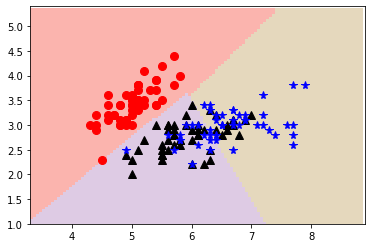

In [ ]:
# Load IRIS data
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.svm import SVC
x = iris.data
y = iris.target

# Chọn ra 2 features để dễ vẽ hình
features = [0,1]
x = x[:,features]

# Train SVM với kernel linear
clf = SVC(C = 1,kernel="linear")
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

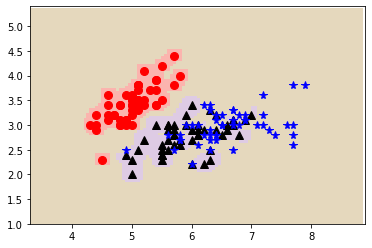

In [ ]:
#Sử dụng kernel rbf với gamma lớn, ta có thể thấy các miền quyết định gần như fit vào các điểm dữ liệu
clf = svm.SVC(C = 1, kernel="rbf",gamma=100)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

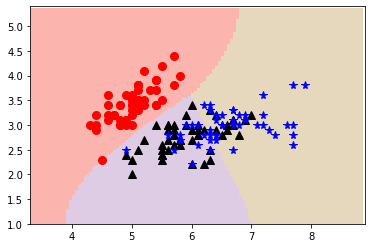

In [ ]:
#Sử dụng kernel rbf, với gamma nhỏ ta thấy miền quyết định rộng hơn
from sklearn import svm
clf = svm.SVC(C = 1, kernel="rbf",gamma=0.5)
clf.fit(x,y)
pred_fn = lambda p: clf.predict(p.reshape(1,-1))
display_data_and_boundary(x,y,pred_fn)

#Bài Tập 
1. Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]

2. Nhận xét với từng $C$ khác nhau thì mô hình thay đổi như thế nào

3. Nêu lợi và hại khi tăng $gamma$ và giảm $gamma$


In [ ]:
#Tải File
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_3.txt #tải file data_3
!wget https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-10/data_4.txt #tải file data_4

In [ ]:
#Đọc file data_3.txt
data = np.loadtxt("data_3.txt")
# Tạo training set x và label y
x = data[:,0:2]
y = data[:,2]